In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl

In [209]:
dfv= pd.read_csv("Valencia_IQR.csv")
dfv.head(5)

,Unnamed: 0,fuente,nombre,descripción,descripción general del vecindario,nombre_host,tiempo_respuesta_host,tasa_respuesta_host,tasa_de_aceptación_host,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_comunicación,review_scores_location,review_scores_value,calculado_host_listings_count,listados_host_calculados_recuento_casas_enteras,calculado_host_listings_count_private_rooms,calculado_host_listings_count_shared_rooms,reseñas_por_mes
0,0,city scrape,Precioso apartamento con wifi,Second floor on a farm from the late 19th cent...,Very close neighborhood to the city's old town...,Antonio,within a few hours,100%,0.93,f,...,4.63,4.84,4.79,4.51,4.52,4.0,4.0,0.0,0,1.01
1,1,city scrape,PENTHOUSE ON FRONT LINE BEACH,Sin descripción,No cuenta con descripción,Cpi GestiÃ³n Encuentra Tu MansiÃ³n,within an hour,100%,0.93,f,...,5.00,5.00,5.00,4.00,4.00,5.0,5.0,0.0,0,0.01
2,2,city scrape,1900 Style Valencian Beach Home for 10px,Typical town house with 5 bedrooms and 4 bathr...,"Surrounded by historic houses, authentic res...",Susana Barbara,within an hour,100%,1.00,f,...,4.55,4.84,4.89,4.60,4.63,1.0,1.0,0.0,0,1.68
3,3,city scrape,â˜… Architectural touch! â˜…,"Hola! I am ready to welcome you in my apt., wh...",Just outside the old city centre (one block aw...,InÃ©s,within an hour,86%,1.00,n,...,4.88,4.89,4.87,4.84,4.85,6.0,6.0,0.0,0,3.31
4,4,city scrape,Apartment near downtown,Sin descripción,It's a neighborhood with all amenities. 200 me...,Maria Jesus,within an hour,93%,0.80,f,...,4.44,4.74,4.78,4.52,4.41,8.0,5.0,0.3,0,1.17


__PRECIO VS TASA ACEPTACIÓN HOST__

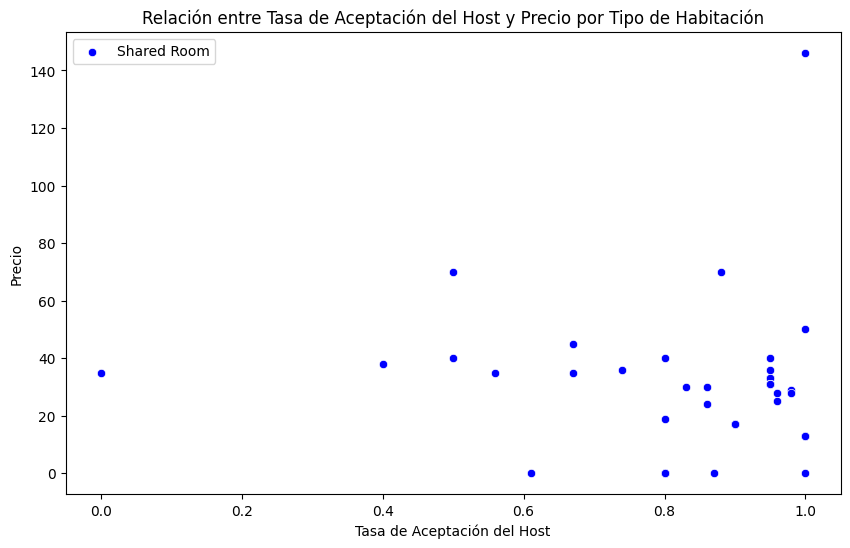

In [210]:
df_shared_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['tasa_de_aceptación_host', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tasa_de_aceptación_host', y='precio', data=df_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre Tasa de Aceptación del Host y Precio por Tipo de Habitación")
plt.xlabel("Tasa de Aceptación del Host")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [211]:
# Llenar los valores nulos con el promedio de la columna
df_shared_room['tasa_de_aceptación_host'] = df_shared_room['tasa_de_aceptación_host'].fillna(dfv['tasa_de_aceptación_host'].mean())

In [212]:
vars_Indep= df_shared_room[['tasa_de_aceptación_host']]
Vars_Dep= df_shared_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [213]:
model.fit(X=vars_Indep, y=Vars_Dep)

LinearRegression()

In [214]:
model.__dict__

y_pred= model.predict(X=df_shared_room[['tasa_de_aceptación_host']])
y_pred

array([26.58543207, 26.58543207, 30.07530619, 26.58543207, 26.58543207,
       26.58543207, 26.81809035, 27.34157146, 29.4936605 , 26.58543207,
       27.16707776, 27.16707776, 27.16707776, 27.16707776, 27.39973603,
       27.39973603, 28.85385025, 29.14467309, 27.74872344, 27.74872344,
       26.87625491, 26.87625491, 26.87625491, 26.87625491, 26.87625491,
       26.87625491, 26.87625491, 26.87625491, 27.74872344, 27.74872344,
       27.74872344, 27.74872344, 27.74872344, 26.81809035, 28.50486283,
       26.87625491, 28.09771085, 27.57422974, 27.16707776, 27.16707776,
       26.70176121, 26.70176121, 27.74872344, 29.4936605 , 27.28340689,
       32.40188893, 28.50486283])

In [215]:
df_shared_room.insert(0, 'Predicciones', y_pred)
df_shared_room

,Predicciones,Unnamed: 0,fuente,nombre,descripción,descripción general del vecindario,nombre_host,tiempo_respuesta_host,tasa_respuesta_host,tasa_de_aceptación_host,...,review_scores_cleanliness,review_scores_checkin,review_scores_comunicación,review_scores_location,review_scores_value,calculado_host_listings_count,listados_host_calculados_recuento_casas_enteras,calculado_host_listings_count_private_rooms,calculado_host_listings_count_shared_rooms,reseñas_por_mes
285,26.585432,285,city scrape,AMBIENTE FAMILIAR 1*/SRA.ALEXANDRA,1 ROOM IS RENTED (2 single beds ) :SHARED WITH...,"THEY HAVE GOOD COMMUNICATION , near beaches, s...",Lupe,NaN,NaN,1.00,...,4.56,4.89,4.56,4.44,4.44,1.0,0.0,0.0,0,0.09
2062,26.585432,2062,city scrape,Best Valencia Beach Homestayâ™œHistoric Areaâ™œ,Basic ground floor homestay (1 SOFA BED in the...,The Cabanyal is a Protected Historic Site from...,Roy,within an hour,100%,1.00,...,4.55,4.33,4.38,4.48,4.10,12.0,3.0,0.3,0,0.70
2086,30.075306,2086,city scrape,ambiente sano y familiar cerca del centro,"it's a large room with a 150 cm bed,a sofa bed...",No cuenta con descripción,Marivi,within a day,100%,0.40,...,3.85,4.71,4.73,4.39,3.93,1.0,0.0,0.0,0,0.70
4048,26.585432,4048,city scrape,Valencia hostel 1,We are hostel with shared bedroom bunk beds. W...,2 minutes walk to metro â€œAmistat-casa de Sal...,Alexei,a few days or more,25%,1.00,...,3.50,4.80,4.50,3.50,4.50,3.0,0.0,0.0,0,0.09
4064,26.585432,4064,city scrape,Valencia hostel 3,We are hostel with shared bedroom bunk beds. W...,No cuenta con descripción,Alexei,a few days or more,25%,1.00,...,4.00,5.00,5.00,4.00,4.00,3.0,0.0,0.0,0,0.05
4074,26.585432,4074,city scrape,Valencia hostel 6,We are hostel with shared bedroom bunk beds. W...,No cuenta con descripción,Alexei,a few days or more,25%,1.00,...,4.00,5.00,5.00,5.00,4.00,3.0,0.0,0.0,0,0.05
4232,26.818090,4232,city scrape,"Super suite for 2 friends, short stays",Great accomodation to pass a few nights with a...,Busy neighbourhood. can be quiet during the week.,Niall,within an hour,100%,0.96,...,4.05,4.55,4.55,4.55,4.14,3.0,0.0,1.0,0,1.07
4804,27.341571,4804,previous scrape,Private Room in Valencia,"Welcome, we rent rooms and apartments in Valen...",Neighborhood located in the very center of the...,Julian Ignacio,within an hour,100%,0.87,...,4.70,4.80,4.80,4.70,4.60,14.0,3.0,0.3,0,0.00
5134,29.493660,5134,city scrape,Habitacion cÃ³moda,Break up with your day-to-day life and relax i...,excellent area with very good tram transport c...,Diana Lizeth,NaN,NaN,0.50,...,4.70,4.80,4.80,4.70,4.60,1.0,0.0,0.0,0,0.00
5924,26.585432,5924,previous scrape,Roomeâ€¢s fallas Ruzafa,"Enjoy the simplicity of this quiet, central home.",Very good area. Downtown neighborhood and wher...,Cristina,NaN,NaN,1.00,...,5.00,5.00,5.00,5.00,5.00,3.0,0.0,2.0,0,0.10


<Axes: xlabel='tasa_de_aceptación_host', ylabel='precio'>

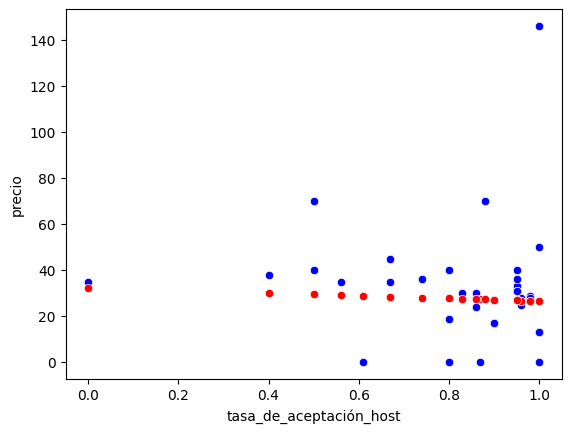

In [216]:
sns.scatterplot(x='tasa_de_aceptación_host', y='precio', color='blue', data=df_shared_room)
sns.scatterplot(x='tasa_de_aceptación_host', y='Predicciones', color='red', data=df_shared_room)

__PRECIO VS TIPO DE HABITACIÓN__

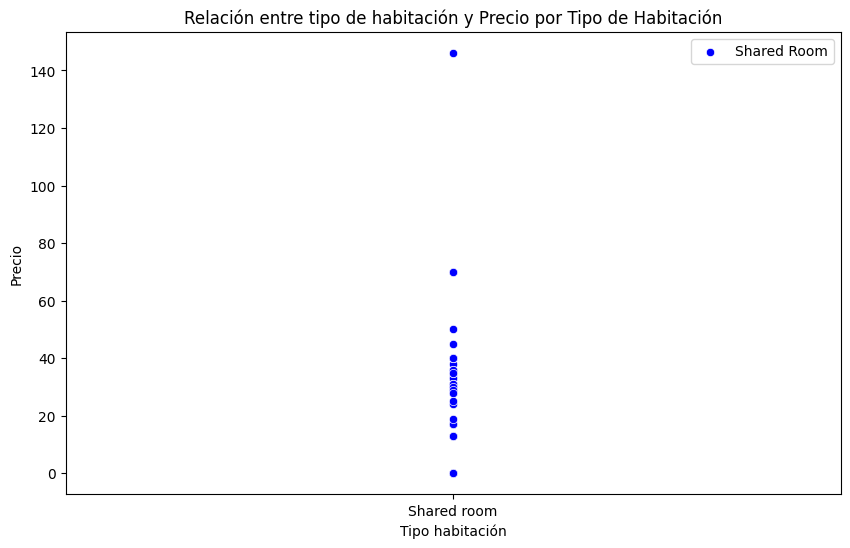

In [217]:
df_type_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['tipo_habitación', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tipo_habitación', y='precio', data=df_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre tipo de habitación y Precio por Tipo de Habitación")
plt.xlabel("Tipo habitación")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [252]:
df_shared_room['tipo_habitación'] = df_shared_room['tipo_habitación'].map({'Shared room': 2})

<Axes: xlabel='tipo_habitación', ylabel='precio'>

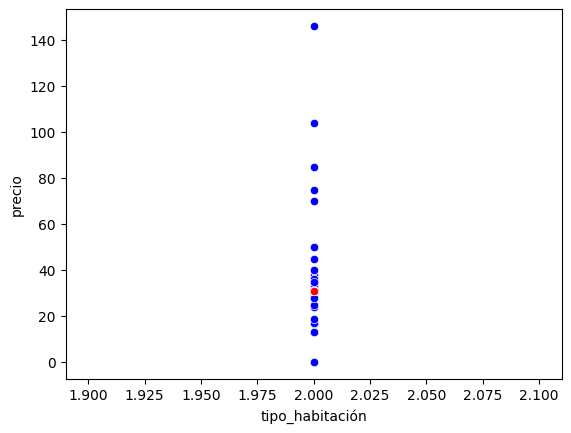

In [256]:
vars_Indep= df_shared_room[['tipo_habitación']]
Vars_Dep= df_shared_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_shared_room[['tipo_habitación']])
y_pred

df_shared_room.insert(0, 'Pre2', y_pred)
df_shared_room

sns.scatterplot(x='tipo_habitación', y='precio', color='blue', data=df_shared_room)
sns.scatterplot(x='tipo_habitación', y='Pre2', color='red', data=df_shared_room)

__PRICE vs HOST IS SUPERHOST

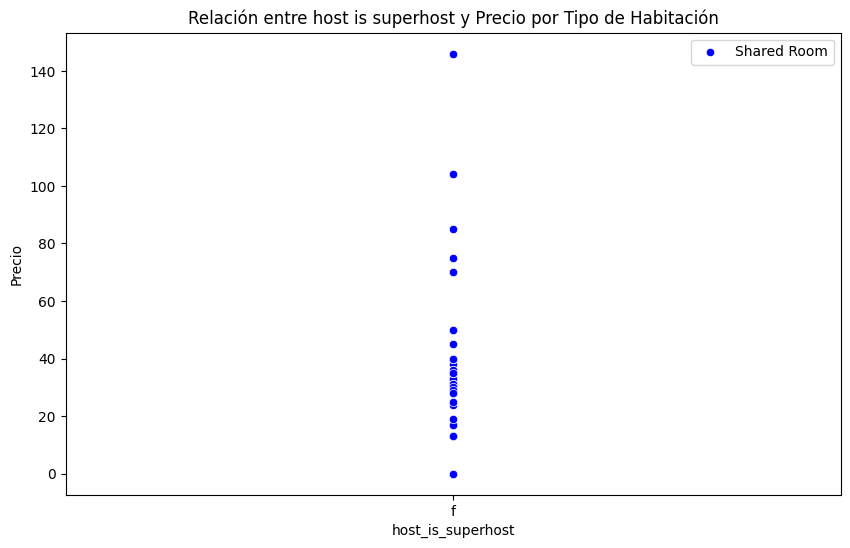

In [219]:
df_shared_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['host_is_superhost', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='host_is_superhost', y='precio', data=df_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre host is superhost y Precio por Tipo de Habitación")
plt.xlabel("host_is_superhost")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [220]:
df_shared_room['host_is_superhost'] = df_shared_room['host_is_superhost'].map({'f': 0, 't': 1})

In [221]:
vars_Indep= df_shared_room[['host_is_superhost']]
Vars_Dep= df_shared_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [222]:
model.fit(X=vars_Indep, y=Vars_Dep)

LinearRegression()

In [223]:
model.__dict__

y_pred= model.predict(X=df_shared_room[['host_is_superhost']])
y_pred

array([31.11320755, 31.11320755, 31.11320755, 31.11320755, 31.11320755,
       31.11320755, 31.11320755, 31.11320755, 31.11320755, 31.11320755,
       31.11320755, 31.11320755, 31.11320755, 31.11320755, 31.11320755,
       31.11320755, 31.11320755, 31.11320755, 31.11320755, 31.11320755,
       31.11320755, 31.11320755, 31.11320755, 31.11320755, 31.11320755,
       31.11320755, 31.11320755, 31.11320755, 31.11320755, 31.11320755,
       31.11320755, 31.11320755, 31.11320755, 31.11320755, 31.11320755,
       31.11320755, 31.11320755, 31.11320755, 31.11320755, 31.11320755,
       31.11320755, 31.11320755, 31.11320755, 31.11320755, 31.11320755,
       31.11320755, 31.11320755, 31.11320755, 31.11320755, 31.11320755,
       31.11320755, 31.11320755, 31.11320755])

In [224]:
df_shared_room.insert(0, 'Prediccion', y_pred)
df_shared_room

,Prediccion,Unnamed: 0,fuente,nombre,descripción,descripción general del vecindario,nombre_host,tiempo_respuesta_host,tasa_respuesta_host,tasa_de_aceptación_host,...,review_scores_cleanliness,review_scores_checkin,review_scores_comunicación,review_scores_location,review_scores_value,calculado_host_listings_count,listados_host_calculados_recuento_casas_enteras,calculado_host_listings_count_private_rooms,calculado_host_listings_count_shared_rooms,reseñas_por_mes
191,31.113208,191,city scrape,HabitaciÃ³n doble en Ruzafa,A room with a double bed in a renovated apartm...,The neighborhood of Ruzafa is the one where th...,George,NaN,NaN,NaN,...,4.75,5.00,5.00,4.75,5.00,1.0,0.0,0.0,0,0.04
285,31.113208,285,city scrape,AMBIENTE FAMILIAR 1*/SRA.ALEXANDRA,1 ROOM IS RENTED (2 single beds ) :SHARED WITH...,"THEY HAVE GOOD COMMUNICATION , near beaches, s...",Lupe,NaN,NaN,1.00,...,4.56,4.89,4.56,4.44,4.44,1.0,0.0,0.0,0,0.09
2062,31.113208,2062,city scrape,Best Valencia Beach Homestayâ™œHistoric Areaâ™œ,Basic ground floor homestay (1 SOFA BED in the...,The Cabanyal is a Protected Historic Site from...,Roy,within an hour,100%,1.00,...,4.55,4.33,4.38,4.48,4.10,12.0,3.0,0.3,0,0.70
2086,31.113208,2086,city scrape,ambiente sano y familiar cerca del centro,"it's a large room with a 150 cm bed,a sofa bed...",No cuenta con descripción,Marivi,within a day,100%,0.40,...,3.85,4.71,4.73,4.39,3.93,1.0,0.0,0.0,0,0.70
4048,31.113208,4048,city scrape,Valencia hostel 1,We are hostel with shared bedroom bunk beds. W...,2 minutes walk to metro â€œAmistat-casa de Sal...,Alexei,a few days or more,25%,1.00,...,3.50,4.80,4.50,3.50,4.50,3.0,0.0,0.0,0,0.09
4064,31.113208,4064,city scrape,Valencia hostel 3,We are hostel with shared bedroom bunk beds. W...,No cuenta con descripción,Alexei,a few days or more,25%,1.00,...,4.00,5.00,5.00,4.00,4.00,3.0,0.0,0.0,0,0.05
4074,31.113208,4074,city scrape,Valencia hostel 6,We are hostel with shared bedroom bunk beds. W...,No cuenta con descripción,Alexei,a few days or more,25%,1.00,...,4.00,5.00,5.00,5.00,4.00,3.0,0.0,0.0,0,0.05
4232,31.113208,4232,city scrape,"Super suite for 2 friends, short stays",Great accomodation to pass a few nights with a...,Busy neighbourhood. can be quiet during the week.,Niall,within an hour,100%,0.96,...,4.05,4.55,4.55,4.55,4.14,3.0,0.0,1.0,0,1.07
4804,31.113208,4804,previous scrape,Private Room in Valencia,"Welcome, we rent rooms and apartments in Valen...",Neighborhood located in the very center of the...,Julian Ignacio,within an hour,100%,0.87,...,4.70,4.80,4.80,4.70,4.60,14.0,3.0,0.3,0,0.00
5134,31.113208,5134,city scrape,Habitacion cÃ³moda,Break up with your day-to-day life and relax i...,excellent area with very good tram transport c...,Diana Lizeth,NaN,NaN,0.50,...,4.70,4.80,4.80,4.70,4.60,1.0,0.0,0.0,0,0.00


<Axes: xlabel='host_is_superhost', ylabel='precio'>

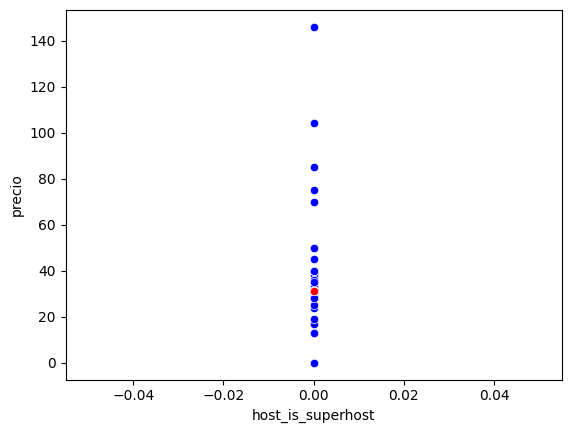

In [225]:
sns.scatterplot(x='host_is_superhost', y='precio', color='blue', data=df_shared_room)
sns.scatterplot(x='host_is_superhost', y='Prediccion', color='red', data=df_shared_room)

__accommodates vs bathrooms__

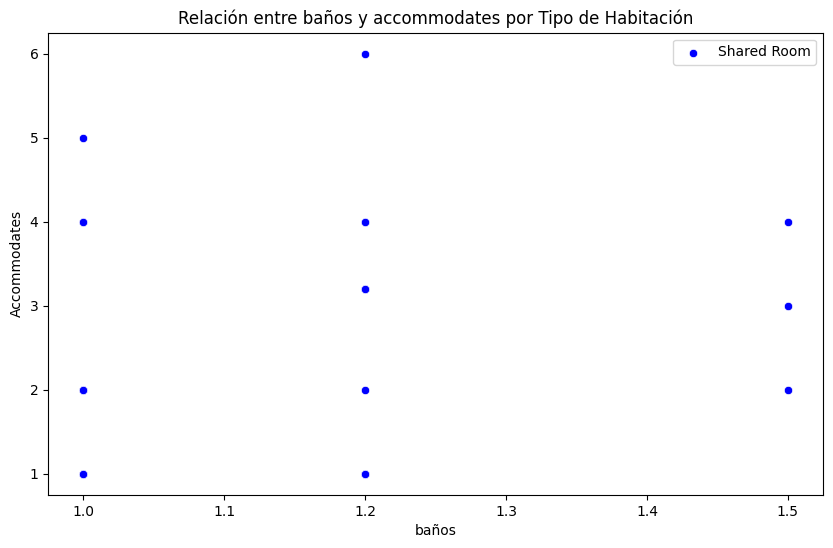

In [226]:
df_shared_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['baños', 'se_adapta'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='baños', y='se_adapta', data=df_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre baños y accommodates por Tipo de Habitación")
plt.xlabel("baños")
plt.ylabel("Accommodates")
plt.legend()
plt.show()

In [227]:
vars_Indep= df_shared_room[['baños']]
Vars_Dep= df_shared_room['se_adapta']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [228]:
model.fit(X=vars_Indep, y=Vars_Dep)

LinearRegression()

In [229]:
model.__dict__

y_pred= model.predict(X=df_shared_room[['baños']])
y_pred

array([1.68185343, 3.26289259, 1.68185343, 3.26289259, 1.68185343,
       1.68185343, 1.68185343, 1.68185343, 2.3142691 , 3.26289259,
       1.68185343, 2.3142691 , 1.68185343, 2.3142691 , 2.3142691 ,
       2.3142691 , 2.3142691 , 2.3142691 , 1.68185343, 1.68185343,
       2.3142691 , 1.68185343, 1.68185343, 2.3142691 , 2.3142691 ,
       1.68185343, 1.68185343, 1.68185343, 1.68185343, 1.68185343,
       1.68185343, 1.68185343, 1.68185343, 2.3142691 , 2.3142691 ,
       1.68185343, 2.3142691 , 2.3142691 , 1.68185343, 1.68185343,
       1.68185343, 1.68185343, 1.68185343, 2.3142691 , 2.3142691 ,
       1.68185343, 1.68185343, 1.68185343, 1.68185343, 1.68185343,
       1.68185343, 1.68185343, 1.68185343])

In [230]:
df_shared_room.insert(0, 'Predicci', y_pred)
df_shared_room

,Predicci,Unnamed: 0,fuente,nombre,descripción,descripción general del vecindario,nombre_host,tiempo_respuesta_host,tasa_respuesta_host,tasa_de_aceptación_host,...,review_scores_cleanliness,review_scores_checkin,review_scores_comunicación,review_scores_location,review_scores_value,calculado_host_listings_count,listados_host_calculados_recuento_casas_enteras,calculado_host_listings_count_private_rooms,calculado_host_listings_count_shared_rooms,reseñas_por_mes
191,1.681853,191,city scrape,HabitaciÃ³n doble en Ruzafa,A room with a double bed in a renovated apartm...,The neighborhood of Ruzafa is the one where th...,George,NaN,NaN,NaN,...,4.75,5.00,5.00,4.75,5.00,1.0,0.0,0.0,0,0.04
285,3.262893,285,city scrape,AMBIENTE FAMILIAR 1*/SRA.ALEXANDRA,1 ROOM IS RENTED (2 single beds ) :SHARED WITH...,"THEY HAVE GOOD COMMUNICATION , near beaches, s...",Lupe,NaN,NaN,1.00,...,4.56,4.89,4.56,4.44,4.44,1.0,0.0,0.0,0,0.09
2062,1.681853,2062,city scrape,Best Valencia Beach Homestayâ™œHistoric Areaâ™œ,Basic ground floor homestay (1 SOFA BED in the...,The Cabanyal is a Protected Historic Site from...,Roy,within an hour,100%,1.00,...,4.55,4.33,4.38,4.48,4.10,12.0,3.0,0.3,0,0.70
2086,3.262893,2086,city scrape,ambiente sano y familiar cerca del centro,"it's a large room with a 150 cm bed,a sofa bed...",No cuenta con descripción,Marivi,within a day,100%,0.40,...,3.85,4.71,4.73,4.39,3.93,1.0,0.0,0.0,0,0.70
4048,1.681853,4048,city scrape,Valencia hostel 1,We are hostel with shared bedroom bunk beds. W...,2 minutes walk to metro â€œAmistat-casa de Sal...,Alexei,a few days or more,25%,1.00,...,3.50,4.80,4.50,3.50,4.50,3.0,0.0,0.0,0,0.09
4064,1.681853,4064,city scrape,Valencia hostel 3,We are hostel with shared bedroom bunk beds. W...,No cuenta con descripción,Alexei,a few days or more,25%,1.00,...,4.00,5.00,5.00,4.00,4.00,3.0,0.0,0.0,0,0.05
4074,1.681853,4074,city scrape,Valencia hostel 6,We are hostel with shared bedroom bunk beds. W...,No cuenta con descripción,Alexei,a few days or more,25%,1.00,...,4.00,5.00,5.00,5.00,4.00,3.0,0.0,0.0,0,0.05
4232,1.681853,4232,city scrape,"Super suite for 2 friends, short stays",Great accomodation to pass a few nights with a...,Busy neighbourhood. can be quiet during the week.,Niall,within an hour,100%,0.96,...,4.05,4.55,4.55,4.55,4.14,3.0,0.0,1.0,0,1.07
4804,2.314269,4804,previous scrape,Private Room in Valencia,"Welcome, we rent rooms and apartments in Valen...",Neighborhood located in the very center of the...,Julian Ignacio,within an hour,100%,0.87,...,4.70,4.80,4.80,4.70,4.60,14.0,3.0,0.3,0,0.00
5134,3.262893,5134,city scrape,Habitacion cÃ³moda,Break up with your day-to-day life and relax i...,excellent area with very good tram transport c...,Diana Lizeth,NaN,NaN,0.50,...,4.70,4.80,4.80,4.70,4.60,1.0,0.0,0.0,0,0.00


<Axes: xlabel='baños', ylabel='se_adapta'>

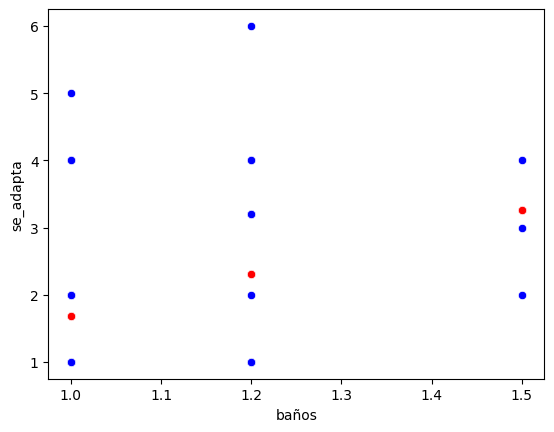

In [231]:
sns.scatterplot(x='baños', y='se_adapta', color='blue', data=df_shared_room)
sns.scatterplot(x='baños', y='Predicci', color='red', data=df_shared_room)

__price vs review_scores_cleanliness__

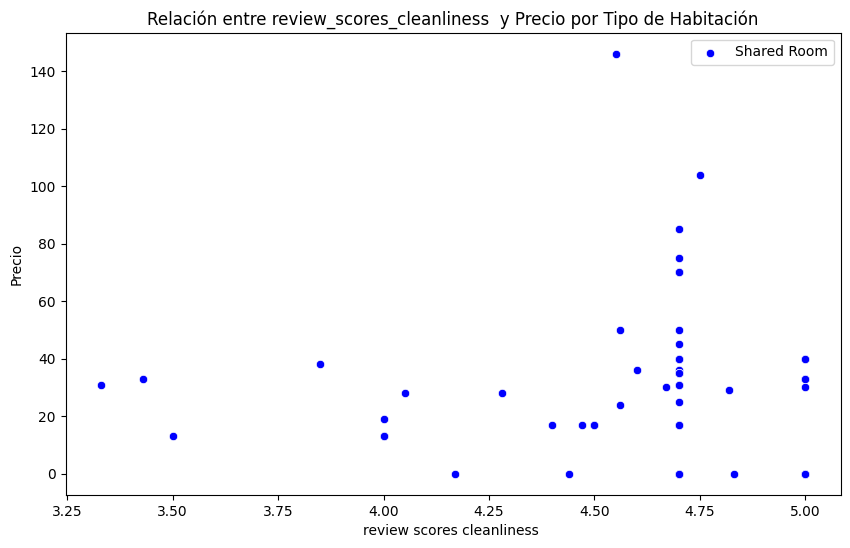

In [232]:
df_shared_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['review_scores_cleanliness', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_cleanliness', y='precio', data=df_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre review_scores_cleanliness  y Precio por Tipo de Habitación")
plt.xlabel("review scores cleanliness ")
plt.ylabel("Precio")
plt.legend()
plt.show()

<Axes: xlabel='review_scores_cleanliness', ylabel='precio'>

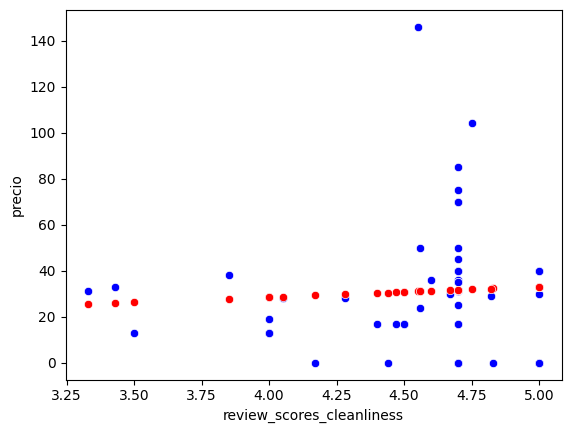

In [233]:
vars_Indep= df_shared_room[['review_scores_cleanliness']]
Vars_Dep= df_shared_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_shared_room[['review_scores_cleanliness']])
y_pred

df_shared_room.insert(0, 'Predicc', y_pred)
df_shared_room

sns.scatterplot(x='review_scores_cleanliness', y='precio', color='blue', data=df_shared_room)
sns.scatterplot(x='review_scores_cleanliness', y='Predicc', color='red', data=df_shared_room)

__price vs número_de_reseñas__

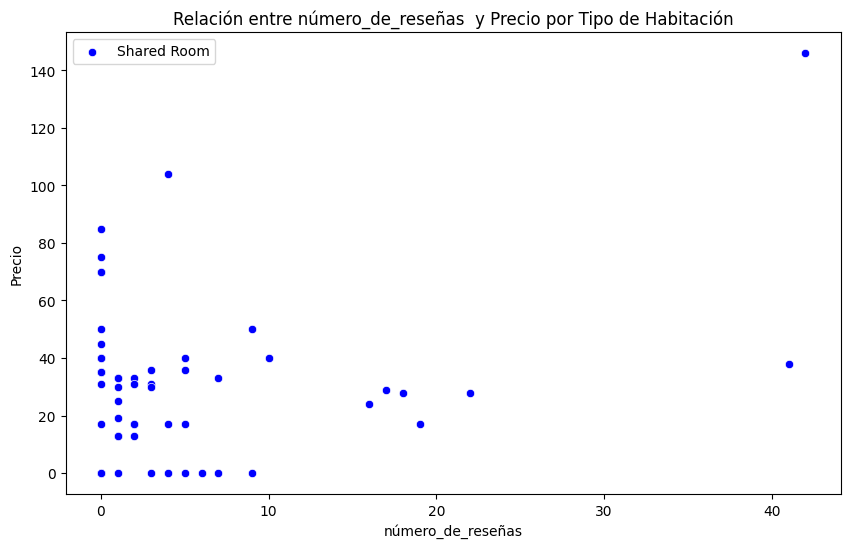

In [234]:
df_shared_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['número_de_reseñas', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='número_de_reseñas', y='precio', data=df_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre número_de_reseñas  y Precio por Tipo de Habitación")
plt.xlabel("número_de_reseñas")
plt.ylabel("Precio")
plt.legend()
plt.show()

<Axes: xlabel='número_de_reseñas', ylabel='precio'>

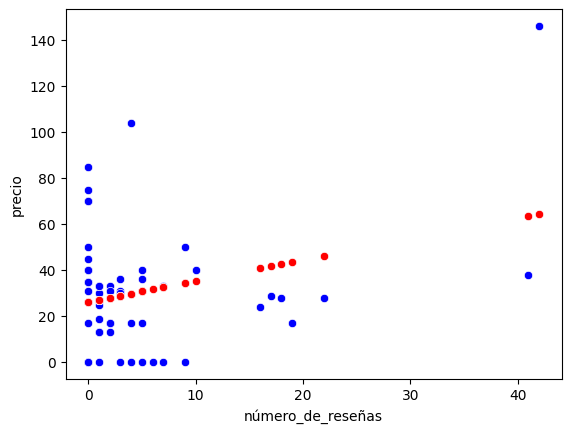

In [235]:
vars_Indep= df_shared_room[['número_de_reseñas']]
Vars_Dep= df_shared_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_shared_room[['número_de_reseñas']])
y_pred

df_shared_room.insert(0, 'Predic', y_pred)
df_shared_room

sns.scatterplot(x='número_de_reseñas', y='precio', color='blue', data=df_shared_room)
sns.scatterplot(x='número_de_reseñas', y='Predic', color='red', data=df_shared_room)

__price vs instant_bookable__

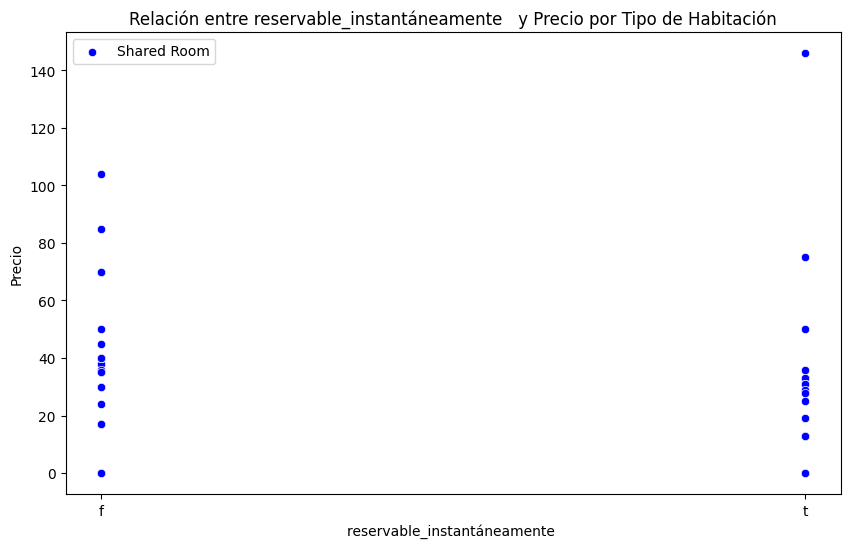

In [236]:
df_shared_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['reservable_instantáneamente', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='reservable_instantáneamente', y='precio', data=df_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre reservable_instantáneamente   y Precio por Tipo de Habitación")
plt.xlabel("reservable_instantáneamente ")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [238]:
df_shared_room['reservable_instantáneamente'] = df_shared_room['reservable_instantáneamente'].map({'f': 0, 't': 1})

<Axes: xlabel='reservable_instantáneamente', ylabel='precio'>

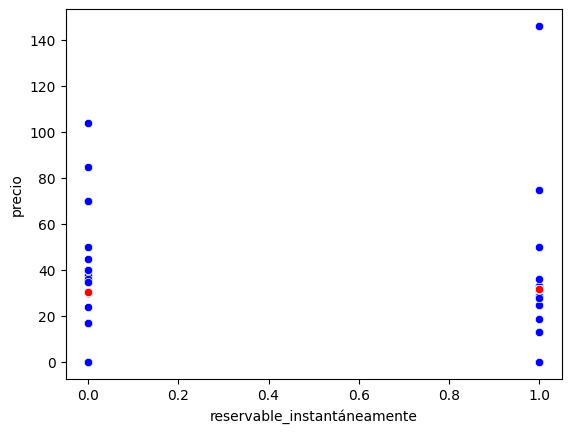

In [242]:
vars_Indep= df_shared_room[['reservable_instantáneamente']]
Vars_Dep= df_shared_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=df_shared_room[['reservable_instantáneamente']])
y_pred

df_shared_room.insert(0, 'Predi', y_pred)
df_shared_room

sns.scatterplot(x='reservable_instantáneamente', y='precio', color='blue', data=df_shared_room)
sns.scatterplot(x='reservable_instantáneamente', y='Predi', color='red', data=df_shared_room)

__Price vs property_type__

In [243]:
frecuencias = dfv['tipo_propiedad'].value_counts()
dfv['tipo_propiedad'] = dfv['tipo_propiedad'].map(frecuencias)
print(dfv[['tipo_propiedad']])

      tipo_propiedad
0               5446
1               5446
2                240
3               5446
4               5446
...              ...
9442            2064
9443            5446
9444             127
9445            5446
9446            5446

[9447 rows x 1 columns]


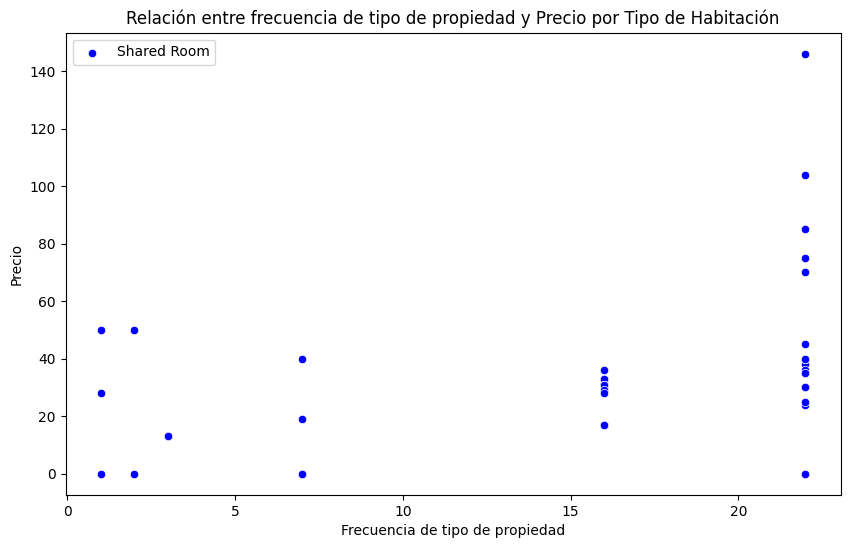

In [246]:
f_shared_room = dfv[dfv['tipo_habitación'] == 'Shared room'].dropna(subset=['tipo_propiedad', 'precio'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tipo_propiedad', y='precio', data=f_shared_room, color='blue', label='Shared Room')
plt.title("Relación entre frecuencia de tipo de propiedad y Precio por Tipo de Habitación")
plt.xlabel("Frecuencia de tipo de propiedad")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [ ]:
tipos_de_propiedad = f_shared_room['tipo_propiedad'].unique()
print(tipos_de_propiedad)


[22  1  3  2 16  7]


<Axes: xlabel='tipo_propiedad', ylabel='precio'>

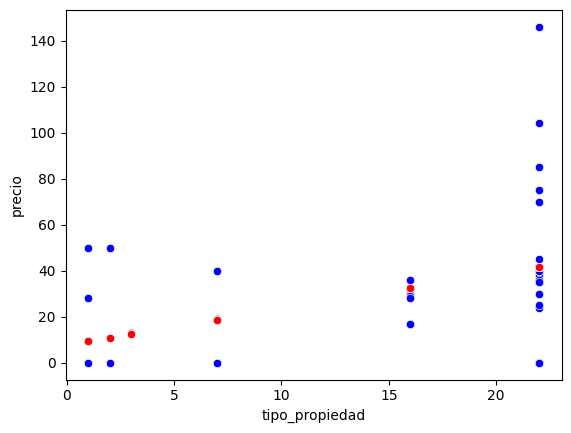

In [251]:
vars_Indep= f_shared_room[['tipo_propiedad']]
Vars_Dep= f_shared_room['precio']

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=vars_Indep, y=Vars_Dep)

model.__dict__

y_pred= model.predict(X=f_shared_room[['tipo_propiedad']])
y_pred

f_shared_room.insert(0, 'Pre', y_pred)
f_shared_room

sns.scatterplot(x='tipo_propiedad', y='precio', color='blue', data=f_shared_room)
sns.scatterplot(x='tipo_propiedad', y='Pre', color='red', data=f_shared_room)